In [3]:
import numpy as np

import matplotlib.pyplot as plt

from utils import *

In [19]:
N = 10**2

T = 1
kB = 1

delta0 = 10*generate_initial_order_parameter(N) 
delta = np.copy(delta0)

H = get_hamiltonian(N)
bdg_H = get_bdg_hamiltonian(H, delta)

for i in range(100):
    energy_array, eigen_vectors = np.linalg.eig(bdg_H)
    delta = update_delta(N, delta, energy_array, eigen_vectors, T=T)
    bdg_H = get_bdg_hamiltonian(H, delta)

9.150991529935861e-09


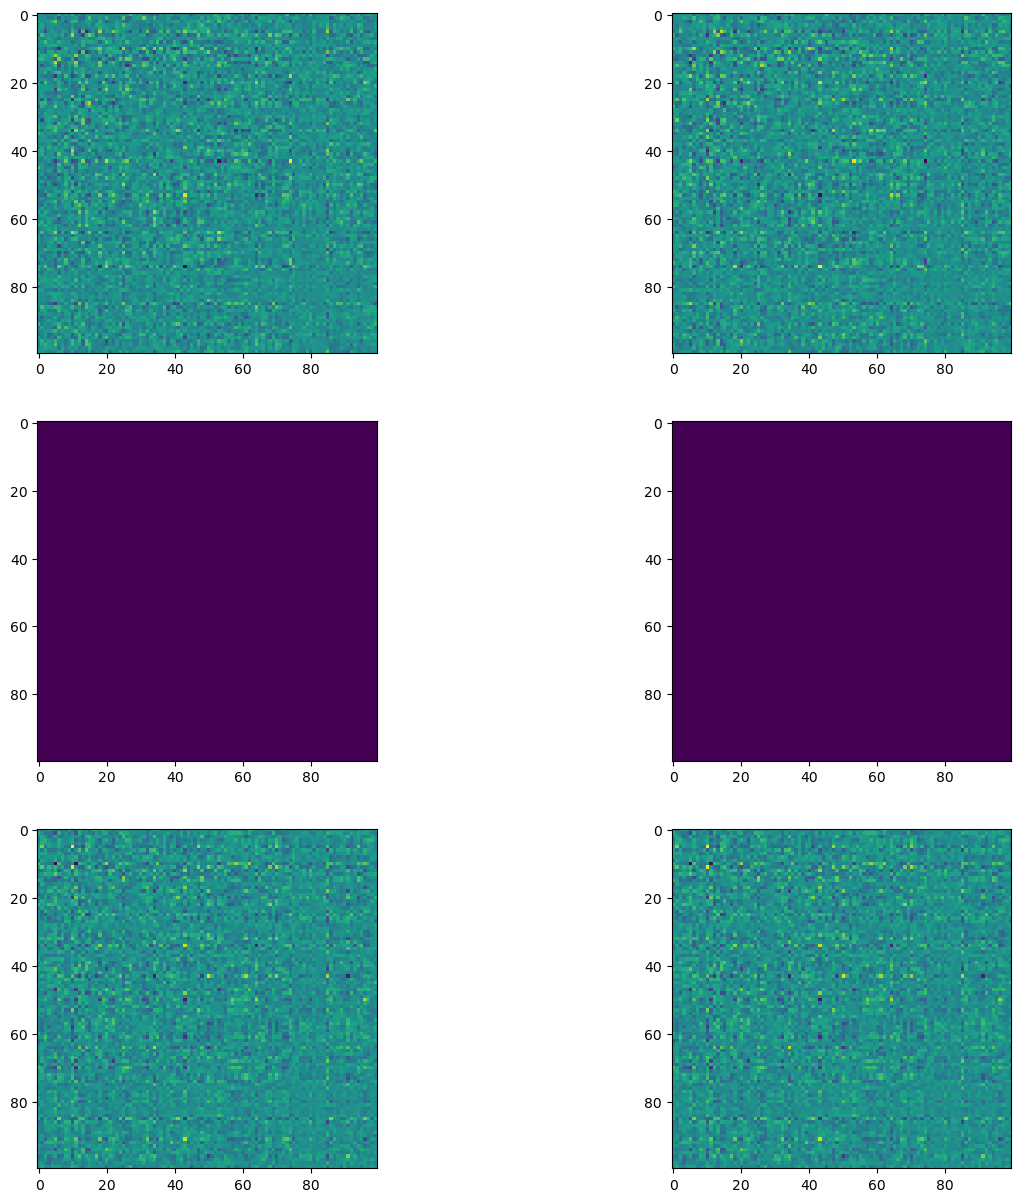

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0,0].imshow(np.imag(delta).T, interpolation='none')
axs[0,1].imshow(np.imag(delta), interpolation='none')
axs[1,0].imshow(np.imag(delta)+np.imag(delta).T, interpolation='none')

axs[1,1].imshow(np.real(delta)+np.real(delta).T, interpolation='none')
axs[2,0].imshow(np.real(delta), interpolation='none')
axs[2,1].imshow(np.real(delta), interpolation='none')

print(np.max(np.real(delta)))

plt.show()

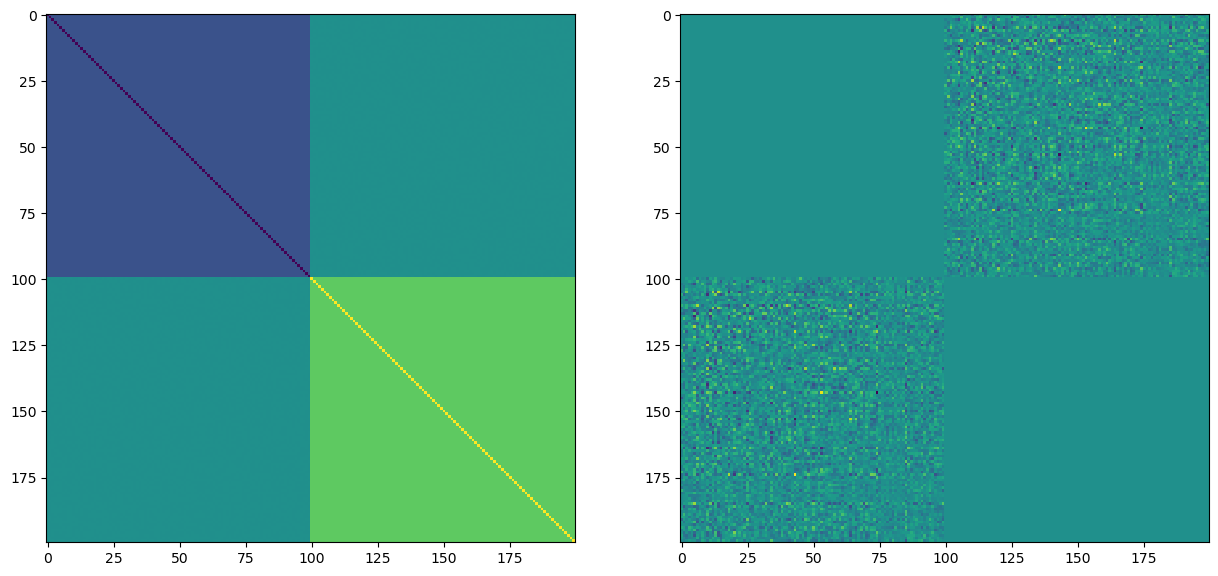

In [21]:
fig, axs = plt.subplots(1, 2,  figsize=(15, 15))

axs[0].imshow(np.real(bdg_H), interpolation='none')
axs[1].imshow(np.imag(bdg_H), interpolation='none')

plt.show()

In [17]:
# Calculating wave symmetries

def out_of_bounds(i, N):
    n = int(np.sqrt(N))

    # If outisde boundary
    if (i < n) or (N-n-1 <= i <= N) or (i%n == 0) or ( i%n == n-1):
        return True

sites_shape = (int(np.sqrt(N)), int(np.sqrt(N)))

delta_px = np.zeros(sites_shape, dtype='complex128').flatten()
delta_py = np.zeros(sites_shape, dtype='complex128').flatten()
delta_flat = delta.flatten()

for i in range(N):
    if out_of_bounds(i, N):
        continue
    delta_px[i] = (delta[i+1, i] - delta[i-1, i]) / 2
    delta_py[i] = (delta[i,i+sites_shape[0]] - delta[i, i-sites_shape[0]]) / 2
        
delta_p = delta_px + 1j*delta_py
delta_m = delta_px - 1j*delta_py

delta_p = delta_p.reshape(sites_shape)
delta_m = delta_m.reshape(sites_shape)

0.0 2.0990152883768766e-10


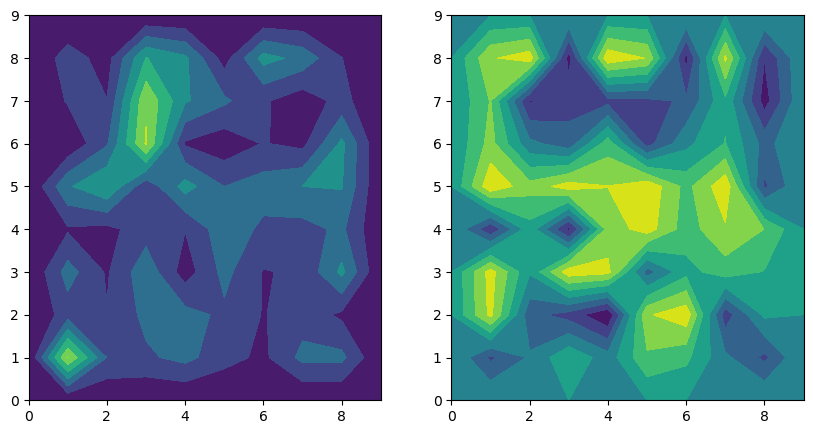

In [18]:
fig, axs = plt.subplots(1, 2,  figsize=(10, 5))

# axs[0].imshow(np.abs(delta_p), interpolation='none')
# axs[1].imshow(np.angle(delta_p), interpolation='none')

axs[0].contourf(np.abs(delta_p))
axs[1].contourf(np.angle(delta_p))

print(np.min(np.abs(delta_m)), np.max(np.abs(delta_m)))

plt.show()